In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'\nFraction of Segmental Duplication False Negative Variants')

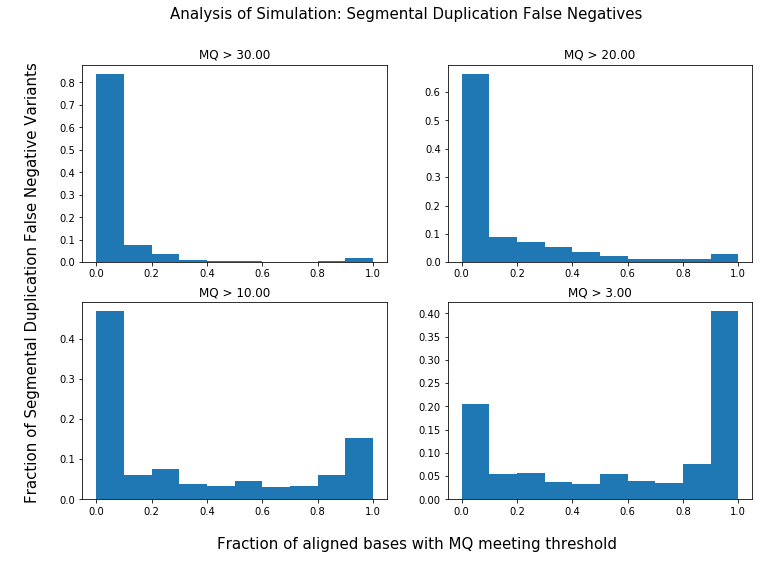

In [50]:
from math import log10
from matplotlib.ticker import FuncFormatter
import numpy as np

# problem: only around 60% recall for pacbio reads in segmental duplications,
# versus roughly 40% for illumina
# we want to call more variants in these regions with pacbio

# objective: figure out, for the false negatives, what their MAPQ situation is like

# we'll plot a histogram of how many FN positions (as a fraction)
# have a given number of reads meeting some MAPQ cutoff,
# as a fraction of the number of reads mapped to that position.

# file containing a samtools mpileup, with mapqs (-s),
# for every position that was a false negative variant inside
# segmental duplications for simulated variant reaper run.
fname = "fn.positions.mpileup.txt"

fig = plt.figure(figsize=(12,8))
plt.suptitle("Analysis of Simulation: Segmental Duplication False Negatives",fontsize=15)
ax = plt.subplot(111)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

mapq_cuts = [30, 20, 10,3]
plt_positions = [221,222,223,224]
for cut, pltpos in zip(mapq_cuts,plt_positions):

    with open(fname,'r') as inf:
        fracs = []
        ax1 = fig.add_subplot(pltpos)
        for line in inf:
            el = line.strip().split()
            mqstr = el[6]

            mqs = [(ord(c)-33) for c in mqstr]

            frac = len([mq for mq in mqs if mq >= cut]) / len(mqs)
            fracs.append(frac)
            
        weights = np.ones_like(fracs)/float(len(fracs))
        ax1.hist(fracs, weights=weights)
        plt.title("MQ > {:0.2f}".format(cut))

ax.set_xlabel('Fraction of aligned bases with MQ meeting threshold\n',fontsize=15,labelpad=20)
ax.set_ylabel('\nFraction of Segmental Duplication False Negative Variants',fontsize=15,labelpad=20)



In [46]:
(ord('5')-33)

20